In [160]:
import pandas as pd
import numpy as np

#Abrimos los df y guardamos en distintas variables
df_fst = pd.read_csv("embeddings_fst.csv")
fst=df_fst.iloc[:,:100]
df_fst_mod=pd.read_csv("mod_embeddings_fst.csv")
fst_mod=df_fst_mod.iloc[:,:100]
df_w2v = pd.read_csv("embeddings_w2v.csv")
w2v=df_w2v.iloc[:,:100]
df_w2v_mod = pd.read_csv("mod_embeddings_w2v.csv")
w2v_mod=df_w2v_mod.iloc[:,:100]
df_fst_mod_K=pd.read_csv("mod_embeddings_fst_with_k.csv")
df_w2v_mod_K=pd.read_csv("mod_embeddings_w2v_with_k.csv")

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

X=fst
for i in range(8):

    num=i+2

    clustering = KMeans(n_clusters=num)
    clustering.fit(fst)
    y_clusters = clustering.predict(fst)
    clusters = clustering.labels_

    kmeans_labels=y_clusters
    print(f"numero de clusters:{num}")
    # Silhouette Score
    silhouette_avg = silhouette_score(X, kmeans_labels)
    print(f"Silhouette Score: {silhouette_avg}")

numero de clusters:2
Silhouette Score: 0.222610013264316
numero de clusters:3
Silhouette Score: 0.2712957560389189
numero de clusters:4
Silhouette Score: 0.3618979456711347
numero de clusters:5
Silhouette Score: 0.3751366031940498
numero de clusters:6


KeyboardInterrupt: 

In [144]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
def silhoutteDF(D,str="Nombre del este"):
    print(str)
    listaSilhouttes=[]
    for i in range(10):
        num=i+2

        clustering = KMeans(n_clusters=num,n_init=10)
        clustering.fit(D)
        y_clusters = clustering.predict(D)

        # Silhouette Score
        silhouette_avg = silhouette_score(D, y_clusters)
        listaSilhouttes.append(silhouette_avg)
        print(f"Clusters:{num} ,Silhouette Score: {silhouette_avg} ")
        #print(f"Silhouette Score: {silhouette_avg}")
    return listaSilhouttes

In [145]:
print("Todos los 100 Componentes")
fst_list=silhoutteDF(fst,"fst")
fst_mod_list=silhoutteDF(fst_mod,"fst modulado")
w2v_list=silhoutteDF(w2v,"w2v")
w2v_mod_list=silhoutteDF(w2v_mod,"w2v modulado")


Todos los 100 Componentes
fst
Clusters:2 ,Silhouette Score: 0.27175284175482656 
Clusters:3 ,Silhouette Score: 0.2699295672394975 
Clusters:4 ,Silhouette Score: 0.36484197336494656 
Clusters:5 ,Silhouette Score: 0.43786529151582265 
Clusters:6 ,Silhouette Score: 0.49369676035588006 
Clusters:7 ,Silhouette Score: 0.5388543909765589 
Clusters:8 ,Silhouette Score: 0.5182127210554942 
Clusters:9 ,Silhouette Score: 0.568616059889163 
Clusters:10 ,Silhouette Score: 0.5786118807284208 
Clusters:11 ,Silhouette Score: 0.556206417076627 
fst modulado
Clusters:2 ,Silhouette Score: 0.24074724962831512 
Clusters:3 ,Silhouette Score: 0.34322654014843673 
Clusters:4 ,Silhouette Score: 0.42655890710523336 
Clusters:5 ,Silhouette Score: 0.5182359102397881 
Clusters:6 ,Silhouette Score: 0.5586941873992796 
Clusters:7 ,Silhouette Score: 0.6030462740911914 
Clusters:8 ,Silhouette Score: 0.635081590973438 
Clusters:9 ,Silhouette Score: 0.6201232749051457 
Clusters:10 ,Silhouette Score: 0.5681870310100112 


In [171]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
def silhoutteDFEtiqueta(D,str="Nombre del este"):
    num=8
    D_clean=D.iloc[:,:100]
    le = LabelEncoder()
    D.iloc[:,100:101] = le.fit_transform(D.iloc[:,100:101].values)
    print(str)
    # Silhouette Score
    silhouette_avg = silhouette_score(D_clean, D.iloc[:,100:101])
    # print(f"Clusters:{num} ,Silhouette Score: {silhouette_avg} ")
    print(f"Silhouette Score: {silhouette_avg}")

In [174]:
silhoutteDFEtiqueta(df_fst,"fst")
silhoutteDFEtiqueta(df_fst_mod,"fst_mod")
silhoutteDFEtiqueta(df_fst_mod_K,"fst_mod_K")
silhoutteDFEtiqueta(df_w2v,"w2v")
silhoutteDFEtiqueta(df_w2v_mod,"w2v_mod")
silhoutteDFEtiqueta(df_w2v_mod_K,"w2v_mod_K")

/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fst
Silhouette Score: 0.5801626551918804
fst_mod


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.6350775595067514
fst_mod_K


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.4569901693347853


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


w2v
Silhouette Score: 0.0773267010339552


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


w2v_mod
Silhouette Score: 0.07203199426009942


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


w2v_mod_K
Silhouette Score: 0.017132060072775842


In [173]:
silhoutteDFEtiqueta(df_w2v_mod_K,"w2v_mod_K")
silhoutteDFEtiqueta(df_fst_mod_K,"fst_mod_K")

/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


w2v_mod_K
Silhouette Score: 0.017132060072775842
fst_mod_K


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.4569901693347853


In [128]:
def grafica(D1,D2,titulo="Titulo de la grafica"):
        
    """Areas de Graficacion y visualizacion de los datos"""
    fig,ax = plt.subplots(figsize=(8,5))
        
    pasos=range(len(D1))
    pasos=[a+2 for a in pasos]
    ax.plot(pasos[:],D1[:],
            color='green',
            linewidth=1,
            label='Score')
    
    pasos=range(len(D2))
    pasos=[a+2 for a in pasos]
    ax.plot(pasos[:],D2[:],
            color='blue',
            linewidth=1,
            label='Modulated Score')
    
    plt.title(titulo)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.grid(True)
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='grey', linestyle='--')
    ax.legend()

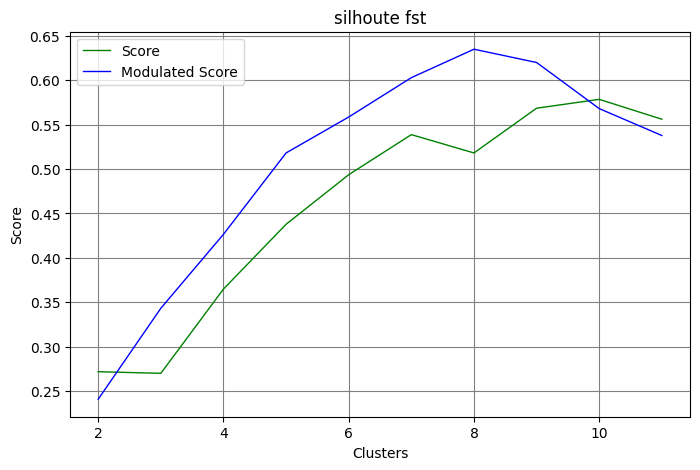

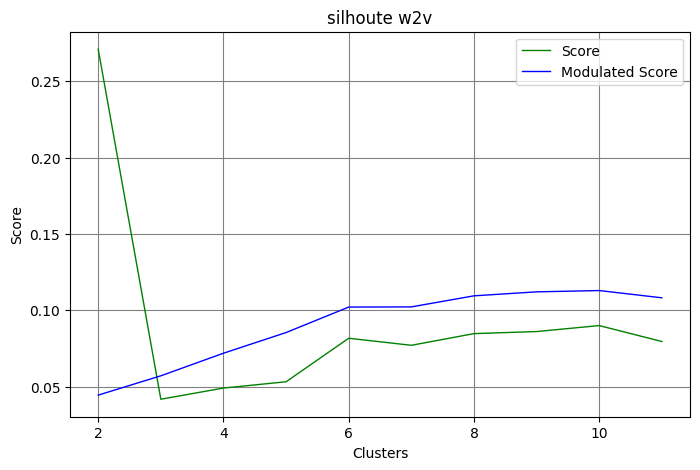

In [146]:
graficaSilhouttes(fst_list,fst_mod_list,"silhoute fst")
graficaSilhouttes(w2v_list,w2v_mod_list,"silhoute w2v")

In [32]:
pca = PCA(n_components=3)

#Los guardamos
principalComponents_fst = pca.fit_transform(fst)
principalDf_fst = pd.DataFrame(data = principalComponents_fst
             , columns = ['pc1', 'pc2','pc3'])

principalComponents_fst_mod = pca.fit_transform(fst_mod)
principalDf_fst_mod = pd.DataFrame(data = principalComponents_fst_mod
             , columns = ['pc1', 'pc2','pc3'])

principalComponents_w2v = pca.fit_transform(w2v)
principalDf_w2v = pd.DataFrame(data = principalComponents_w2v
             , columns = ['pc1', 'pc2','pc3'])

principalComponents_w2v_mod = pca.fit_transform(w2v_mod)
principalDf_w2v_mod = pd.DataFrame(data = principalComponents_w2v_mod
             , columns = ['pc1', 'pc2','pc3'])

print("PCA- 3 Componentes principales")
# silhoutteDF(principalDf_fst,"fst")
# silhoutteDF(principalDf_fst_mod,"fst modulado")
# silhoutteDF(principalDf_w2v,"w2v")
# silhoutteDF(principalDf_w2v_mod,"w2v modulado")
PCA3_fst_NMI_list=NMI(principalDf_fst,"fst")
PCA3_fst_mod_NMI_list=NMI(df_fst_mod,"fst_mod")
PCA3_w2v_NMI_list=NMI(df_w2v,"w2v")
PCA3_w2v_mod_NMI_list=NMI(df_w2v_mod)
grafica(principalComponents_fst,principalComponents_fst,"NMI fst")

PCA- 3 Componentes principales
fst
Clusters:2 ,Silhouette Score: 0.4480744986760385 
Clusters:3 ,Silhouette Score: 0.3934211661354874 
Clusters:4 ,Silhouette Score: 0.5636582660172686 
Clusters:5 ,Silhouette Score: 0.4999527986738486 
Clusters:6 ,Silhouette Score: 0.49789127912812464 
Clusters:7 ,Silhouette Score: 0.5027873507884714 
Clusters:8 ,Silhouette Score: 0.5040262677804961 
Clusters:9 ,Silhouette Score: 0.4908068867903734 
fst modulado
Clusters:2 ,Silhouette Score: 0.3749631485375679 
Clusters:3 ,Silhouette Score: 0.4962456759491966 
Clusters:4 ,Silhouette Score: 0.6902333615047738 
Clusters:5 ,Silhouette Score: 0.7023706123042739 
Clusters:6 ,Silhouette Score: 0.7732684744200982 
Clusters:7 ,Silhouette Score: 0.7790406795747186 
Clusters:8 ,Silhouette Score: 0.7457041432023904 
Clusters:9 ,Silhouette Score: 0.7513756212110612 
w2v
Clusters:2 ,Silhouette Score: 0.4476379740817889 


KeyboardInterrupt: 

In [139]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import normalized_mutual_info_score





def NMI(D,str="Nombre del este"):
    # Convertir etiquetas categóricas a numéricas
    listaNMI=[]
    D_clean=D.iloc[:,:100]
    for i in range(10):
        num=i+2
        #Convertir las etiquetas de emociones a int
        le = LabelEncoder()
        D.iloc[:,100:101] = le.fit_transform(D.iloc[:,100:101])

        #El clustering
        clustering = KMeans(n_clusters=num,n_init=10)
        clustering.fit(D_clean)
        y_clusters = clustering.predict(D_clean)
        #Sacamos las etiquetas conocidas del dataframe
        knownLabels=D.iloc[:,100:101].values.ravel()
        # Calcular NMI
        nmi_score = normalized_mutual_info_score(knownLabels, y_clusters)
        listaNMI.append(nmi_score)
        # print("Clusters: ",num)
        # print("Normalized Mutual Information (NMI):", nmi_score)
    return listaNMI


In [140]:
fst_NMI_list=NMI(df_fst,"fst")
fst_mod_NMI_list=NMI(df_fst_mod,"fst_mod")
w2v_NMI_list=NMI(df_w2v,"w2v")
w2v_mod_NMI_list=NMI(df_w2v_mod)


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/pr

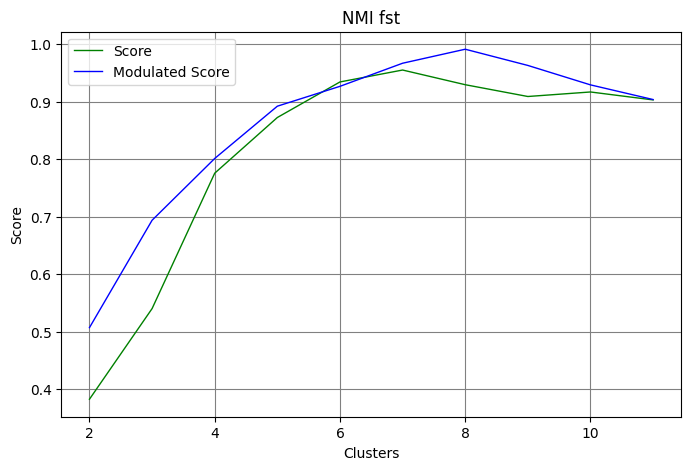

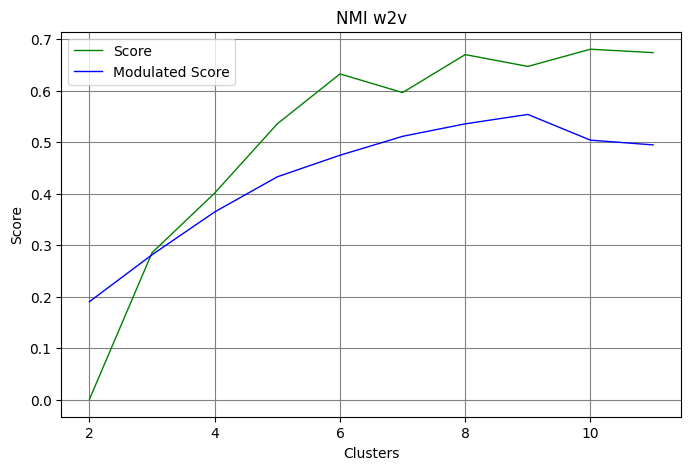

In [141]:
grafica(fst_NMI_list,fst_mod_NMI_list,"NMI fst")
grafica(w2v_NMI_list,w2v_mod_NMI_list,"NMI w2v")

/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/pr

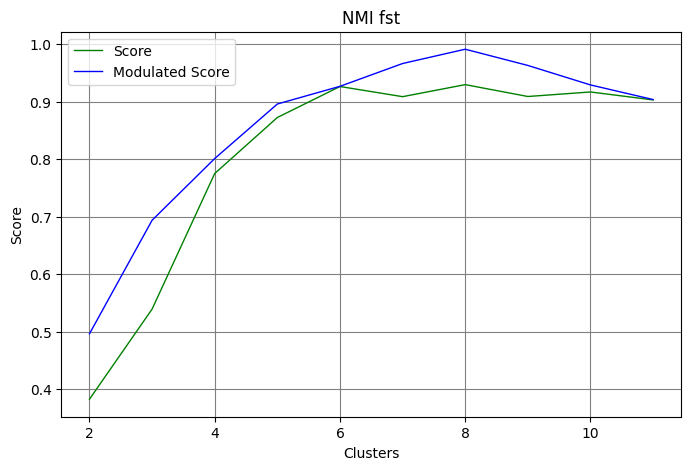

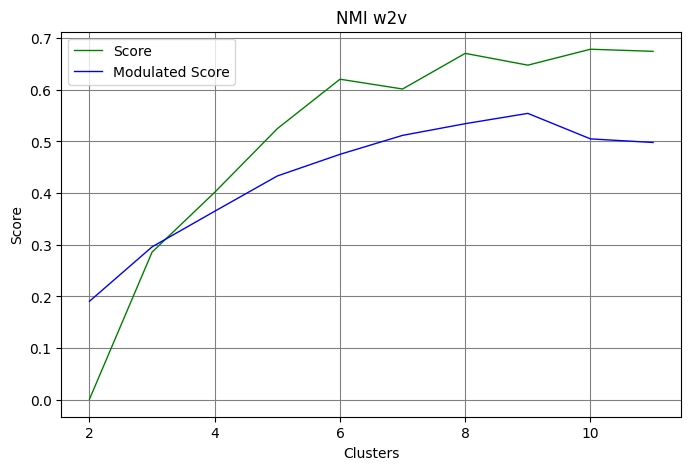

In [142]:
fst_NMI_list=NMI(df_fst,"fst")
fst_mod_NMI_list=NMI(df_fst_mod,"fst_mod")
w2v_NMI_list=NMI(df_w2v,"w2v")
w2v_mod_NMI_list=NMI(df_w2v_mod)

grafica(fst_NMI_list,fst_mod_NMI_list,"NMI fst")
grafica(w2v_NMI_list,w2v_mod_NMI_list,"NMI w2v")